# Customer Churn Analysis

**Importing Libraries**

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Uploading the data**

In [82]:
bankdf = pd.read_csv('DS_C12_S2_Classification_BankChurn_Data_Project.csv')

In [83]:
bankdf

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [84]:
bankdf.shape

(10000, 13)

In [85]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [86]:
bankdf.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [87]:
# no null values

In [88]:
bankdf.duplicated().sum()

0

In [89]:
# no duplicates

In [90]:
bankdf.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [91]:
bankdf['Geography'].value_counts()

France     5001
Germany    2502
Spain      2469
france        7
espanio       6
fra           6
ger           4
spain         2
germany       1
gernamy       1
GERMANY       1
Name: Geography, dtype: int64

In [92]:
bankdf['Geography'] = bankdf['Geography'].replace(['fra', 'france'], 'France')
bankdf['Geography'] = bankdf['Geography'].replace(['ger', 'germany','gernamy','GERMANY'], 'Germany')
bankdf['Geography'] = bankdf['Geography'].replace(['espanio', 'spain'], 'Spain')

In [93]:
# EDA
bankdf.drop(columns=['CustomerId','Surname'],inplace=True)

In [94]:
cat_col = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Exited']
bankdf[cat_col] = bankdf[cat_col].astype('category')

In [15]:
# data looks normally distributed

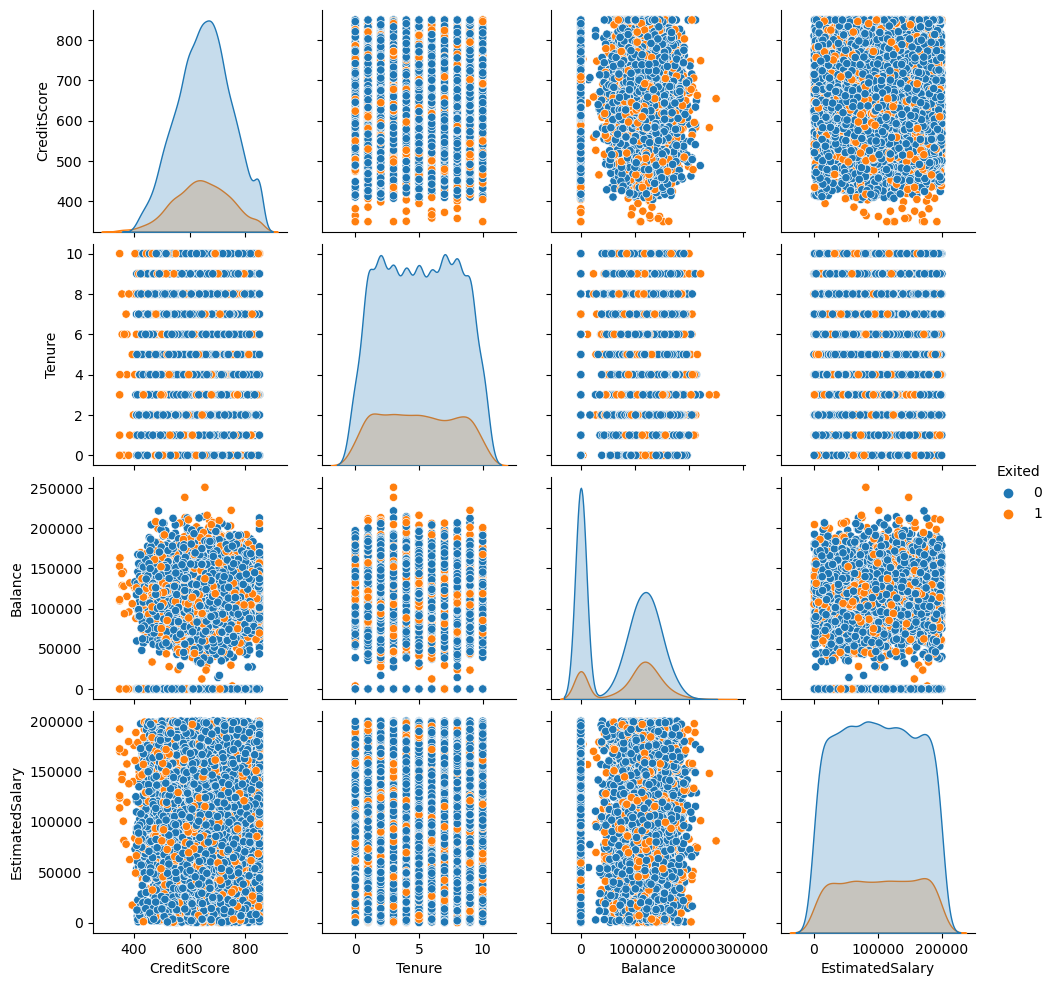

In [21]:
sns.pairplot(bankdf,hue='Exited')

In [17]:
# draw the uni for the exited and othr cat. col. 

In [97]:
def hist_box(*s):
    for col in s:
        fig,ax=plt.subplots(1,2,figsize=(15,4))
        ax=ax.ravel()
        sns.histplot(x=col,bins=10,ax=ax[0],data=bankdf)
        ax[0].set_title(f"distribution of {col} using histogram")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")
        
        
        sns.boxplot(y=bankdf[col],ax=ax[1])
        ax[1].set_title(f"distribution using boxplot of {col}")

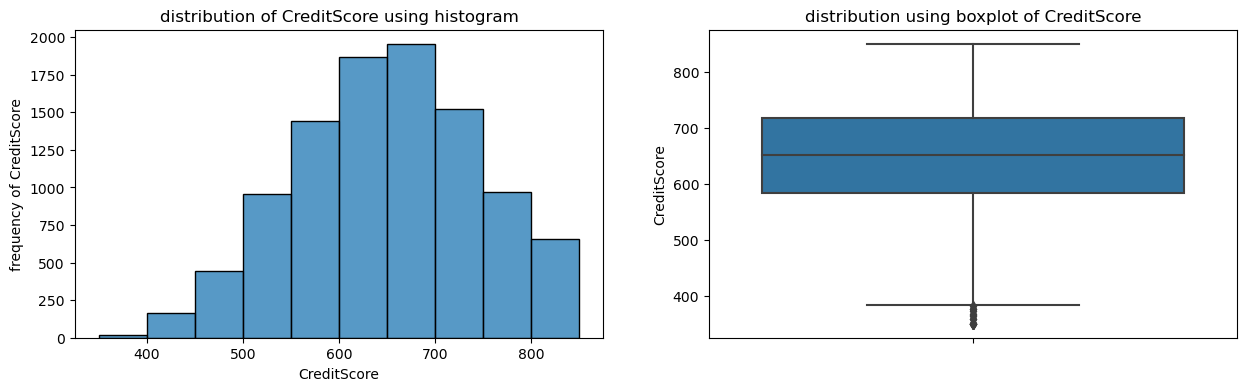

In [98]:
hist_box('CreditScore')

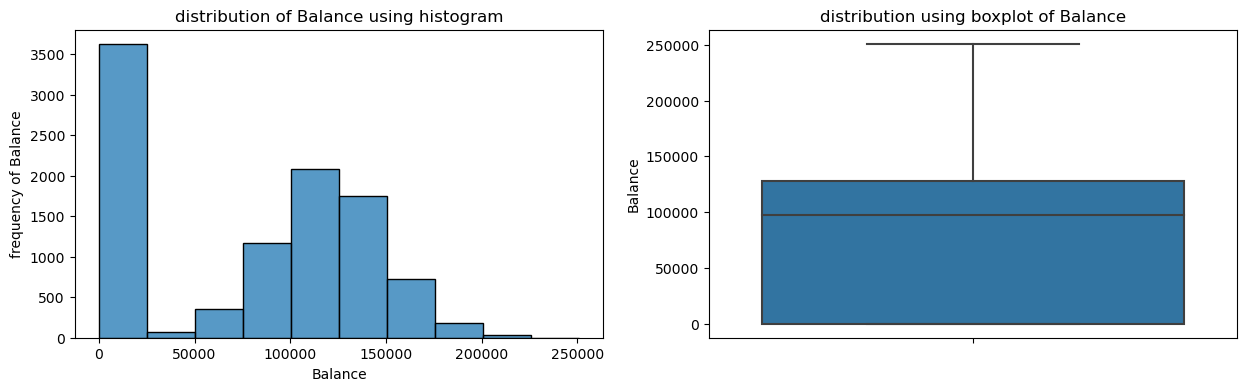

In [99]:
hist_box('Balance')

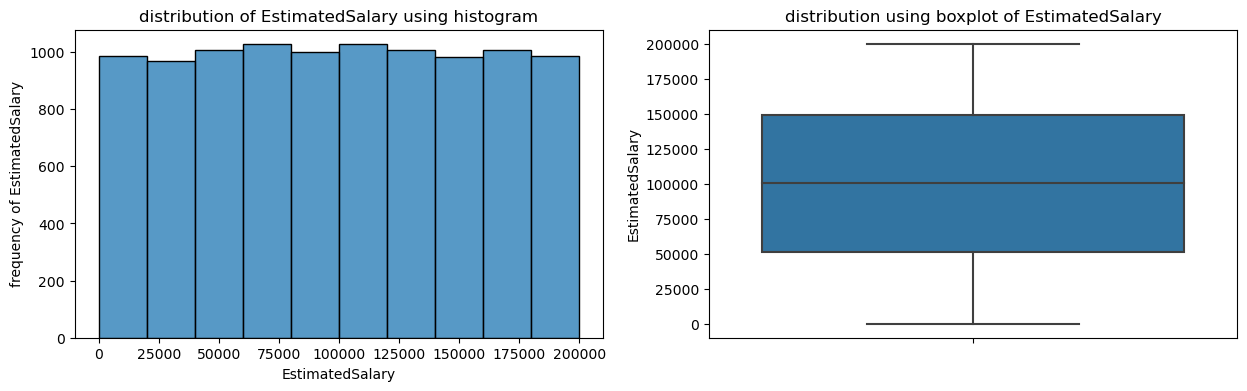

In [100]:
hist_box('EstimatedSalary')

In [101]:
# bivariate

In [102]:
# customer of Age above 40 have left the company , to overcome rig skew we can transfor . to convert normal dis

Text(0.5, 1.0, 'Tenure wise Attrition')

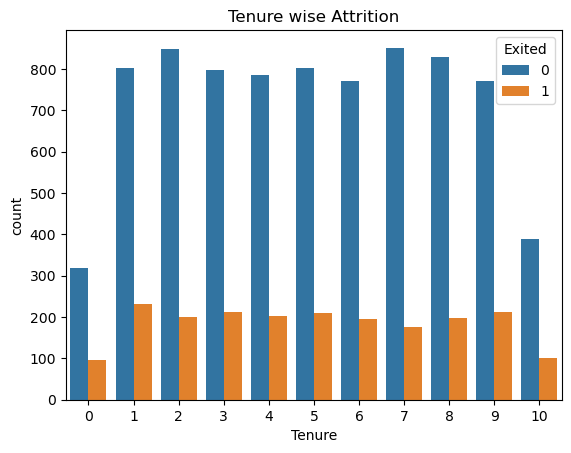

In [103]:
sns.countplot(x='Tenure',hue='Exited',data=bankdf)
plt.title('Tenure wise Attrition')

In [104]:
# tenure with 1are th

Text(0.5, 1.0, 'Balance wise Attrition')

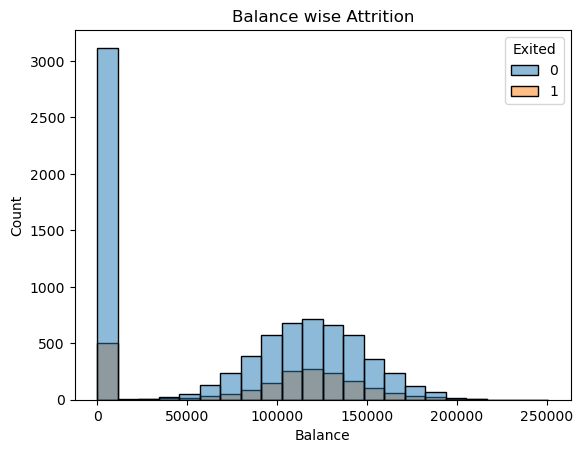

In [106]:
sns.histplot(x='Balance',hue='Exited',data=bankdf)
plt.title('Balance wise Attrition')

In [107]:
# zero balance cust more who are goin to leave
# 2 col. one with zero balance and othr for non zero

In [108]:
bankdf['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Age wise Attrition')

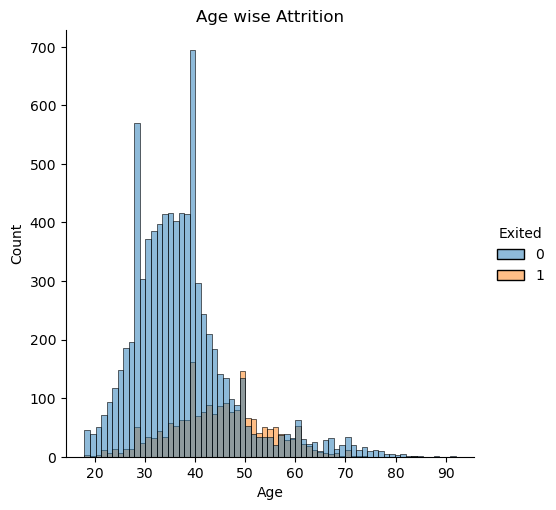

In [109]:
sns.displot(x="Age",hue="Exited",data=bankdf)
plt.title('Age wise Attrition')

In [1]:
# age 50-60 attrited

In [110]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  category
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  category
dtypes: category(6), float64(2), int64(3)
memory usage: 450.2 KB


In [186]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# no normal dis Standard scaler

In [187]:
label_encoder =preprocessing.LabelEncoder()

for col in cat_col:
    bankdf[col] = label_encoder.fit_transform(bankdf[col])

In [188]:
bankdf

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,0,1,1,101348.88,1
1,608,2,0,41,1,83807.86,0,0,1,112542.58,0
2,502,0,0,42,8,159660.80,2,1,0,113931.57,1
3,699,0,0,39,1,0.00,1,0,0,93826.63,0
4,850,2,0,43,2,125510.82,0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,1,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,0,1,1,101699.77,0
9997,709,0,0,36,7,0.00,0,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,1,1,0,92888.52,1


<AxesSubplot:>

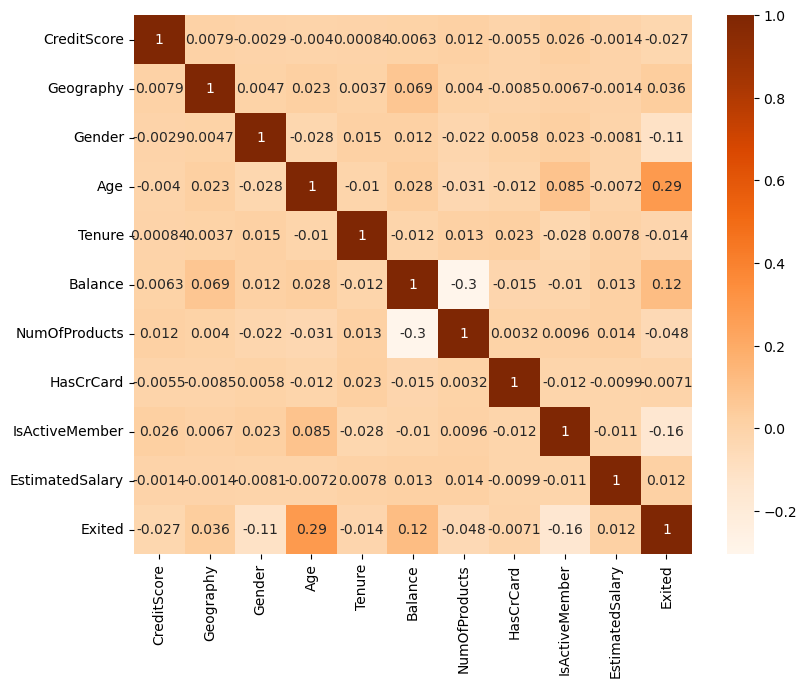

In [114]:
corr_mat1 = bankdf.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr_mat1,annot=True,cmap='Oranges')

In [115]:
# scaling

In [189]:
bankdf

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,0,1,1,101348.88,1
1,608,2,0,41,1,83807.86,0,0,1,112542.58,0
2,502,0,0,42,8,159660.80,2,1,0,113931.57,1
3,699,0,0,39,1,0.00,1,0,0,93826.63,0
4,850,2,0,43,2,125510.82,0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,1,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,0,1,1,101699.77,0
9997,709,0,0,36,7,0.00,0,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,1,1,0,92888.52,1


In [190]:
# splitting

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
x=bankdf.drop(['Exited'],axis=1)
y=bankdf['Exited']

In [193]:
scaled_x = StandardScaler().fit_transform(x)
scaled_x

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [194]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,0,1,1,101348.88
1,608,2,0,41,1,83807.86,0,0,1,112542.58
2,502,0,0,42,8,159660.80,2,1,0,113931.57
3,699,0,0,39,1,0.00,1,0,0,93826.63
4,850,2,0,43,2,125510.82,0,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,1,1,0,96270.64
9996,516,0,1,35,10,57369.61,0,1,1,101699.77
9997,709,0,0,36,7,0.00,0,0,1,42085.58
9998,772,1,1,42,3,75075.31,1,1,0,92888.52


In [122]:
# pip install imblearn

In [123]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
x1,y1 = os.fit_resample(scaled_x,y)

In [124]:
X_train.shape

(11148, 10)

In [125]:
X_test.shape

(4778, 10)

In [126]:
# scaled and now splitting

In [127]:
X_train, X_test,y_train, y_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

# Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score

In [129]:
# kfold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [130]:
log_model = LogisticRegression().fit(X_train,y_train)

In [131]:
y_pred=log_model.predict(X_test)

In [132]:
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [135]:
log_model.score(X_train,y_train)

0.7039827771797632

In [136]:
log_model.score(X_test,y_test)

0.7053160318124738

In [137]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1709  717]
 [ 691 1661]]


Text(0.5, 1.0, 'logistic')

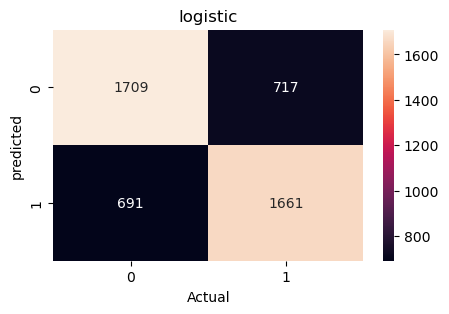

In [138]:
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,fmt='d') # fmt formatting
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title('logistic')

In [140]:
print(precision_score(y_test,y_pred))

0.6984861227922624


In [141]:
print(f1_score(y_test,y_pred))

0.702325581395349


In [142]:
print(accuracy_score(y_test,y_pred))

0.7053160318124738


In [143]:
print(recall_score(y_test,y_pred))

0.7062074829931972


In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      2426
           1       0.70      0.71      0.70      2352

    accuracy                           0.71      4778
   macro avg       0.71      0.71      0.71      4778
weighted avg       0.71      0.71      0.71      4778



In [146]:
log_prob=log_model.predict_proba(X_test)
log_prob=log_prob[:,1]
r_prob=[0 for _ in range(len(y_test))]

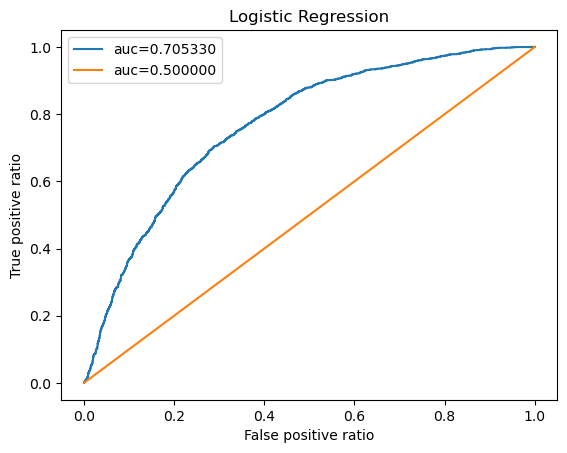

In [148]:
fpr,tpr,threshold=roc_curve(y_test,log_prob)
auc=roc_auc_score(y_test,y_pred)
r_fpr,r_tpr,threshold=roc_curve(y_test,r_prob)
r_auc=roc_auc_score(y_test,r_prob)
plt.plot(fpr,tpr,label="auc={:2f}".format(auc))
plt.plot(r_fpr,r_tpr,label="auc={:2f}".format(r_auc))
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.title('Logistic Regression')
plt.legend()
plt.show()

# Naive Bayes 

In [149]:
from sklearn.naive_bayes import GaussianNB 

In [150]:
nb_model = GaussianNB().fit(X_train,y_train)

In [151]:
y_pred2=nb_model.predict(X_test)

In [152]:
y_pred2

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [153]:
# bar plot b/w exited aft balaanced
print("Testing naive: ",nb_model.score(X_test,y_test))

Testing naive:  0.7411050648807033


In [154]:
print("train naive:", nb_model.score(X_train,y_train))

train naive: 0.7457839971295299


In [155]:
cm1=confusion_matrix(y_test,y_pred2)
print(cm1)

[[1814  612]
 [ 625 1727]]


Text(0.5, 1.0, 'Naive')

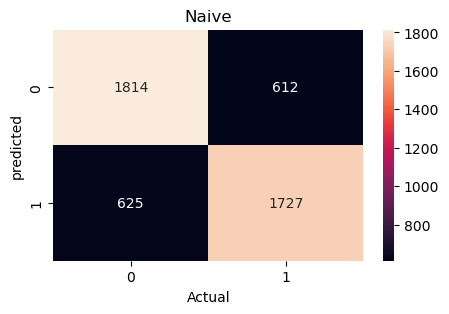

In [156]:
plt.figure(figsize=(5,3))
sns.heatmap(cm1,annot=True,fmt="d")
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title('Naive')

In [157]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      2426
           1       0.74      0.73      0.74      2352

    accuracy                           0.74      4778
   macro avg       0.74      0.74      0.74      4778
weighted avg       0.74      0.74      0.74      4778



In [158]:
print(precision_score(y_test,y_pred2))

0.7383497221034631


In [159]:
print(f1_score(y_test,y_pred2))

0.736303560008527


In [160]:
print(accuracy_score(y_test,y_pred2))

0.7411050648807033


In [161]:
print(recall_score(y_test,y_pred2))

0.7342687074829932


In [165]:
nb_prob=nb_model.predict_proba(X_test)
nb_prob=nb_prob[:,1]
r_prob=[0 for _ in range(len(y_test))]

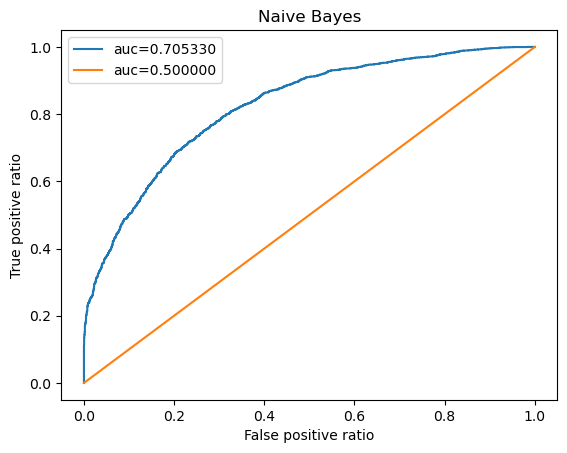

In [166]:
fpr,tpr,threshold=roc_curve(y_test,nb_prob)
auc=roc_auc_score(y_test,y_pred)
r_fpr,r_tpr,threshold=roc_curve(y_test,r_prob)
r_auc=roc_auc_score(y_test,r_prob)
plt.plot(fpr,tpr,label="auc={:2f}".format(auc))
plt.plot(r_fpr,r_tpr,label="auc={:2f}".format(r_auc))
plt.title('Naive Bayes')
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.legend()
plt.show()

# Decision Tree Classifier

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [168]:
kf=KFold(n_splits=5,random_state=42,shuffle=True)

In [169]:
dt=DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

In [170]:
param_grid={'min_samples_split':[3,5,7,9,10,40,80,100],
           'min_samples_leaf':[1,3,4,5,6,7,8,10,40,80,100],
           'max_depth':[3,4,5,6,7,8,9,10],
           'max_features':[2,3,4,5,6,7]}

In [171]:
gridcv=GridSearchCV(dt,param_grid,cv=kf)

In [172]:
gridcv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 3, 4, 5, 6, 7, 8, 10, 40, 80,
                                              100],
                         'min_samples_split': [3, 5, 7, 9, 10, 40, 80, 100]})

In [173]:
gridcv.best_score_

0.8191607570005652

In [174]:
gridcv.best_params_

{'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 100}

In [175]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=7, min_samples_leaf=3,
                       min_samples_split=100, random_state=42)

In [176]:
dt_model=DecisionTreeClassifier(max_depth=10, max_features=7,min_samples_split=100,min_samples_leaf=3, random_state=42).fit(X_train,y_train)
y_pred4=dt_model.predict(X_test)

In [177]:
print('Score Training: ',dt_model.score(X_train,y_train))
print('Score Test: ',dt_model.score(X_test,y_test))

Score Training:  0.8439181916038752
Score Test:  0.8185433235663457


In [178]:
cm4=confusion_matrix(y_test,y_pred4)
print(cm4)

[[2008  418]
 [ 449 1903]]


Text(0.5, 1.0, 'Decision Tree')

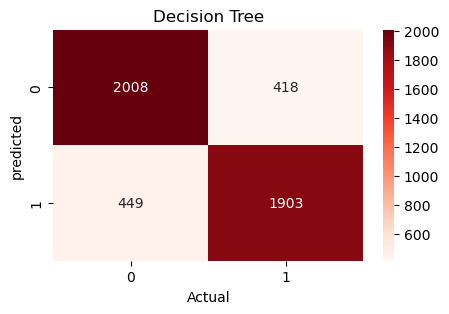

In [179]:
plt.figure(figsize=(5,3))
sns.heatmap(cm4,annot=True,fmt="d",cmap="Reds")
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title('Decision Tree')

In [180]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      2426
           1       0.82      0.81      0.81      2352

    accuracy                           0.82      4778
   macro avg       0.82      0.82      0.82      4778
weighted avg       0.82      0.82      0.82      4778



In [181]:
print(precision_score(y_test,y_pred4))

0.8199052132701422


In [182]:
print(f1_score(y_test,y_pred4))

0.8144660817462016


In [183]:
print(accuracy_score(y_test,y_pred4))

0.8185433235663457


In [184]:
print(recall_score(y_test,y_pred4))

0.8090986394557823


In [195]:
dt_prob=dt_model.predict_proba(X_test)
dt_prob=dt_prob[:,1]
r_prob=[0 for _ in range(len(y_test))]

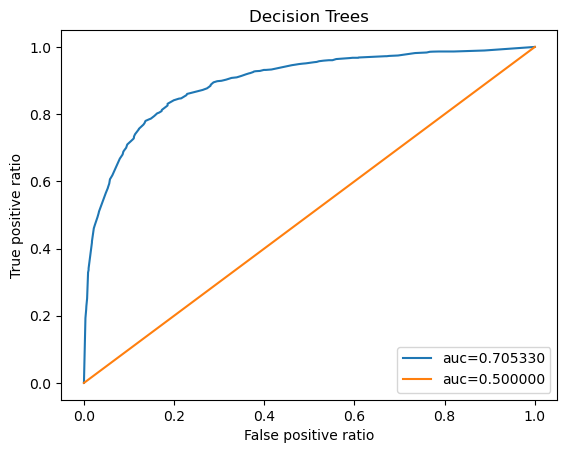

In [197]:
fpr,tpr,threshold=roc_curve(y_test,dt_prob)
auc=roc_auc_score(y_test,y_pred)
r_fpr,r_tpr,threshold=roc_curve(y_test,r_prob)
r_auc=roc_auc_score(y_test,r_prob)
plt.plot(fpr,tpr,label="auc={:2f}".format(auc))
plt.plot(r_fpr,r_tpr,label="auc={:2f}".format(r_auc))
plt.title('Decision Trees')
plt.xlabel('False positive ratio')
plt.ylabel('True positive ratio')
plt.legend()
plt.show()

[Text(0.5478193681318682, 0.9545454545454546, 'Age <= 0.103\ngini = 0.5\nsamples = 11148\nvalue = [5537, 5611]\nclass = y[1]'),
 Text(0.32503434065934067, 0.8636363636363636, 'NumOfProducts <= 0.832\ngini = 0.422\nsamples = 5718\nvalue = [3987, 1731]\nclass = y[0]'),
 Text(0.22630494505494506, 0.7727272727272727, 'Geography <= -0.901\ngini = 0.395\nsamples = 5432\nvalue = [3963, 1469]\nclass = y[0]'),
 Text(0.1143543956043956, 0.6818181818181818, 'NumOfProducts <= 0.795\ngini = 0.301\nsamples = 2611\nvalue = [2129, 482]\nclass = y[0]'),
 Text(0.06387362637362637, 0.5909090909090909, 'Balance <= -0.28\ngini = 0.402\nsamples = 1377\nvalue = [994, 383]\nclass = y[0]'),
 Text(0.027472527472527472, 0.5, 'Balance <= -1.212\ngini = 0.499\nsamples = 391\nvalue = [203, 188]\nclass = y[0]'),
 Text(0.02197802197802198, 0.4090909090909091, 'Tenure <= -1.289\ngini = 0.494\nsamples = 343\nvalue = [191, 152]\nclass = y[0]'),
 Text(0.016483516483516484, 0.3181818181818182, 'gini = 0.0\nsamples = 24\nv

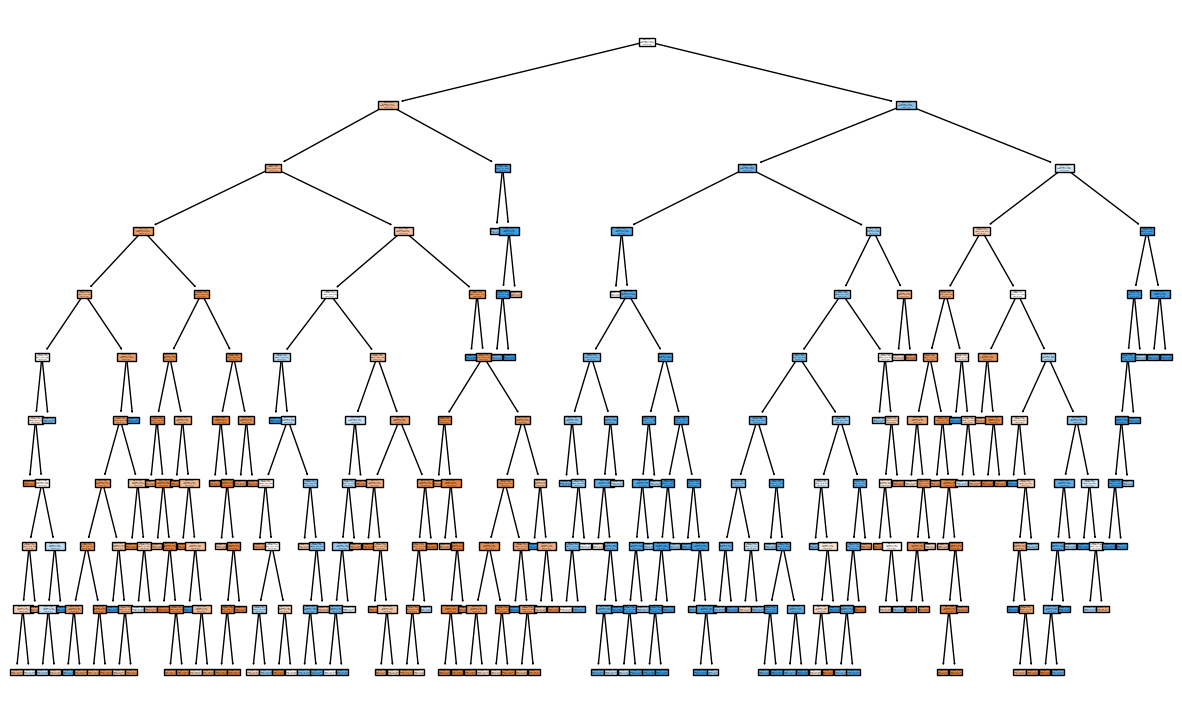

In [198]:
plt.figure(figsize=(15,9))
tree.plot_tree(dt_model,filled=True,feature_names=bankdf.columns,class_names=True)

# Random Forest

In [199]:
# only use grd
from sklearn.ensemble import RandomForestClassifier

In [200]:
rf=RandomForestClassifier()

In [201]:
param_grid={"n_estimators":[10,20,40,50,70,100,150,200], #base learner
            "min_samples_split":[10,20,30], #sample size
            "min_samples_leaf":[20,40,100],
            "max_depth":[3,4,5,6,7,8,9,10]
}

In [202]:
grid_cv2 = GridSearchCV(rf,param_grid,cv=kf,scoring="accuracy")

In [203]:
grid_cv2.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [10, 20, 40, 50, 70, 100, 150, 200]},
             scoring='accuracy')

In [204]:
grid_cv2.best_score_

0.8361135219195802

In [205]:
grid_cv2.best_params_

{'max_depth': 10,
 'min_samples_leaf': 20,
 'min_samples_split': 10,
 'n_estimators': 200}

In [206]:
grid_cv2.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=10,
                       n_estimators=200)

In [207]:
rm_model=RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=10,n_estimators=200, random_state=42).fit(X_train,y_train)
y_pred3=rm_model.predict(X_test)

In [208]:
print("Train Random:" ,rm_model.score(X_train,y_train))

Train Random: 0.8658952278435594


In [209]:
print("Test Random:" ,rm_model.score(X_test,y_test))

Test Random: 0.8336123901213897


In [213]:
cm3=confusion_matrix(y_test,y_pred3)
print(cm3)

[[2010  416]
 [ 379 1973]]


Text(0.5, 1.0, 'Random')

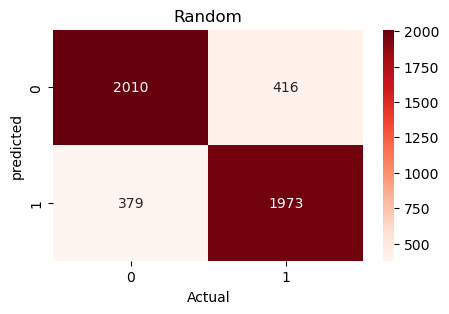

In [214]:
plt.figure(figsize=(5,3))
sns.heatmap(cm3,annot=True,cmap='Reds',fmt="d")
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title('Random')

In [215]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2426
           1       0.83      0.84      0.83      2352

    accuracy                           0.83      4778
   macro avg       0.83      0.83      0.83      4778
weighted avg       0.83      0.83      0.83      4778



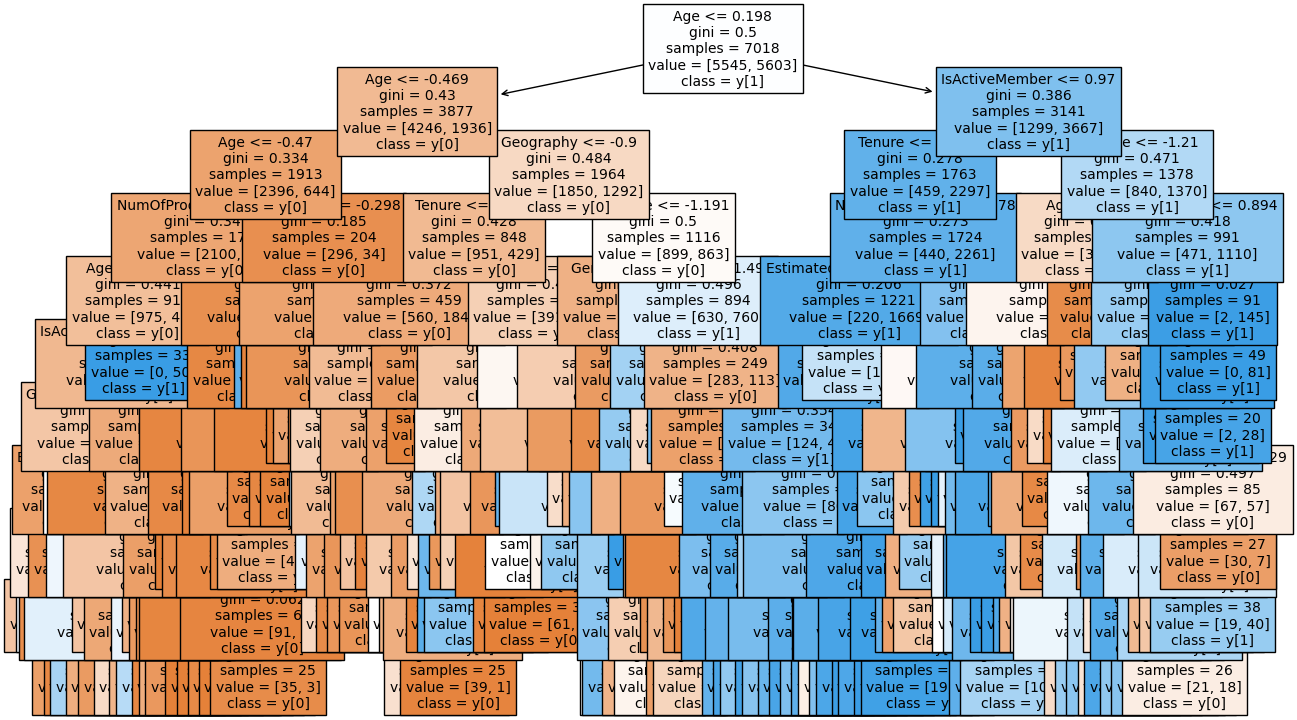

In [216]:
from sklearn import tree
plt.figure(figsize=(15,9))
tree.plot_tree(rm_model.estimators_[1],feature_names=bankdf.columns,class_names=True,filled=True,fontsize=10)
plt.show()

In [219]:
print(precision_score(y_test,y_pred3))

0.8258685642528254


In [220]:
print(f1_score(y_test,y_pred3))

0.8323138578358996


In [221]:
print(accuracy_score(y_test,y_pred3))

0.8336123901213897


In [222]:
print(recall_score(y_test,y_pred3))

0.8388605442176871


# KNN

In [223]:
x1.shape

(15926, 10)

In [224]:
y1.shape

(15926,)

In [225]:
from sklearn.neighbors import KNeighborsClassifier

In [226]:
score1=[]
for i in range(110,130):
    score=cross_val_score(KNeighborsClassifier(i),x1,y1,cv=kf,scoring='accuracy')
    print(f'{i} : ',np.mean(score))
    score1.append(np.mean(score))

110 :  0.7624646880336953
111 :  0.7618369810621626
112 :  0.7613974797509907
113 :  0.7606439278594243
114 :  0.7610833897516707
115 :  0.7602044068387894
116 :  0.7602671420589096
117 :  0.7600161223405776
118 :  0.7612090178676134
119 :  0.7594509732039998
120 :  0.7599531900258293
121 :  0.758697460731359
122 :  0.7599531308974409
123 :  0.7586345284166107
124 :  0.7590112945076625
125 :  0.7575043089813067
126 :  0.7585716552302508
127 :  0.757629779421547
128 :  0.7583833510225763
129 :  0.757064649994432


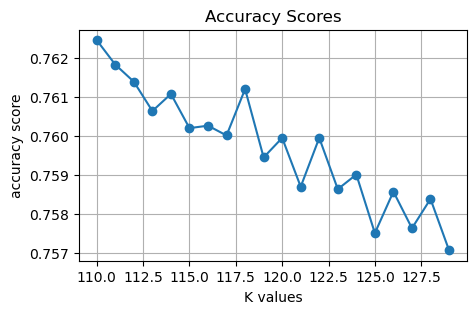

In [227]:
plt.figure(figsize=(5,3))
plt.plot(range(110,130),score1,marker='o')
plt.xlabel('K values')
plt.ylabel('accuracy score')
plt.title("Accuracy Scores")
plt.grid()
plt.show()

In [229]:
k=110
k_model = KNeighborsClassifier(k).fit(X_train,y_train)
y_predk = k_model.predict(X_test)

In [230]:
y_predk

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [231]:
print("Training score:", k_model.score(X_train,y_train))

Training score: 0.7711697165410836


In [232]:
print("Testing score:", k_model.score(X_test,y_test))

Testing score: 0.752197572205944


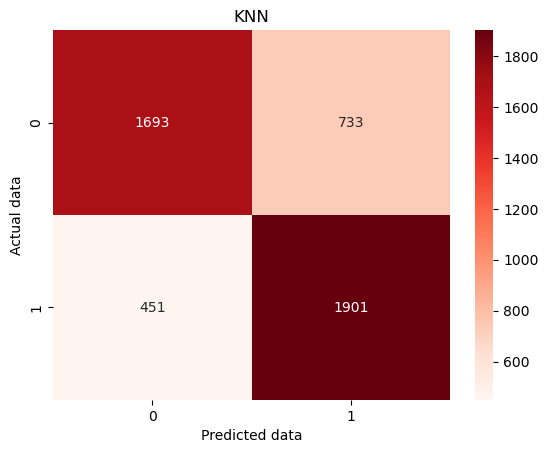

In [233]:
sns.heatmap(confusion_matrix(y_test,y_predk),annot=True,fmt='g',cmap='Reds')
plt.ylabel('Actual data')
plt.xlabel('Predicted data')
plt.title('KNN')
plt.show()

In [234]:
print(classification_report(y_test,y_predk))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      2426
           1       0.72      0.81      0.76      2352

    accuracy                           0.75      4778
   macro avg       0.76      0.75      0.75      4778
weighted avg       0.76      0.75      0.75      4778



In [235]:
print(precision_score(y_test,y_predk))

0.7217160212604404


In [236]:
print(f1_score(y_test,y_predk))

0.7625350982751704


In [237]:
print(accuracy_score(y_test,y_predk))

0.752197572205944


In [238]:
print(recall_score(y_test,y_predk))

0.8082482993197279


# ADABoost

In [109]:
from sklearn.ensemble import AdaBoostClassifier

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
ad = AdaBoostClassifier(n_estimators=i,learning_rate=0.5)

In [112]:
param_grid = {
    'n_estimators': [10,20,30,40,50, 100], 
    'learning_rate': [0.01, 0.1,0.5, 1.0],  
}

In [113]:
grid_cv = GridSearchCV(ad,param_grid,cv=kf,scoring="accuracy")

In [114]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(learning_rate=0.5, n_estimators=129),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [10, 20, 30, 40, 50, 100]},
             scoring='accuracy')

In [115]:
grid_cv.best_score_

0.8443670571572847

In [116]:
grid_cv.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [117]:
grid_cv.best_estimator_

AdaBoostClassifier(n_estimators=100)

In [118]:
ad_model = AdaBoostClassifier(learning_rate=0.5, n_estimators=30)
ad_model.fit(x,y)

AdaBoostClassifier(learning_rate=0.5, n_estimators=30)

In [119]:
ad_model.score(X_train,y_train)

0.6131144599928239

In [120]:
ad_model.score(X_test,y_test)

0.6203432398493093

# Stacking

In [239]:
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [240]:
level1=[]
level1.append(('lr',LogisticRegression()))
level1.append(('KNN',KNeighborsClassifier()))
level1.append(('ny',GaussianNB()))
level1.append(('SVM',SVC()))
level1.append(('DT',DecisionTreeClassifier(max_depth=10, max_features=5,min_samples_split=3, random_state=42)))
level1.append(('RF',RandomForestClassifier(max_depth=9, min_samples_leaf=20, min_samples_split=10,n_estimators=70)))
level2=LogisticRegression()
stac_model=StackingClassifier(estimators=level1,final_estimator=level2,cv=kf)

In [241]:
level1

[('lr', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('ny', GaussianNB()),
 ('SVM', SVC()),
 ('DT',
  DecisionTreeClassifier(max_depth=10, max_features=5, min_samples_split=3,
                         random_state=42)),
 ('RF',
  RandomForestClassifier(max_depth=9, min_samples_leaf=20, min_samples_split=10,
                         n_estimators=70))]

In [242]:
s_model=stac_model.fit(X_train,y_train)
y_pred6=s_model.predict(X_test)

In [243]:
print('Score Training: ',s_model.score(X_train,y_train))
print('Score Test: ',s_model.score(X_test,y_test))

Score Training:  0.9193577323286688
Score Test:  0.8637505232314776


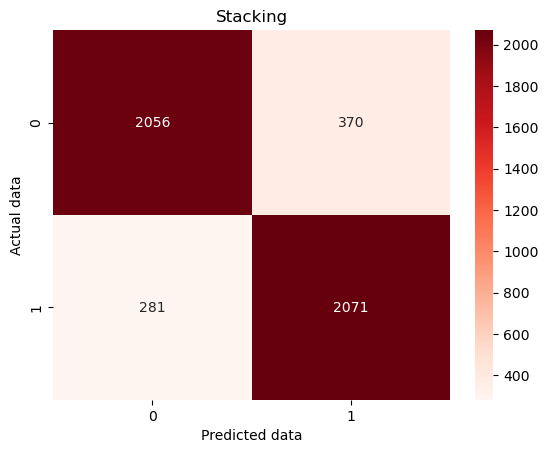

In [244]:
sns.heatmap(confusion_matrix(y_test,y_pred6),annot=True,fmt='g',cmap='Reds')
plt.ylabel('Actual data')
plt.xlabel('Predicted data')
plt.title('Stacking')
plt.show()

In [245]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      2426
           1       0.85      0.88      0.86      2352

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778



In [246]:
print(precision_score(y_test,y_pred6))

0.8484227775501844


In [247]:
print(f1_score(y_test,y_pred6))

0.8641769246818276


In [248]:
print(accuracy_score(y_test,y_pred6))

0.8637505232314776


In [249]:
print(recall_score(y_test,y_pred6))

0.8805272108843537


**Stacking performs best with 86% accuracy.**